# <p style="background-color:blue; font-family:newtimeroman; font-size:180%; text-align:center; color:white">📚TimeSeries Analysis Data Kas BRI📈</p>

## <p style="background-color:blue; font-family:newtimeroman; font-size:120%; text-align:center; color:white">Table of Content</p>

* [1. Library and Setup](#1)
    * [1.1 Import Module and Library](#1.1)
* [2. Data Preparation](#2)
    * [2.1 Load Data](#2.1)
    * [2.2 Get Data from Branch 148 KC Sampang](#2.2)
* [3. Data Visualization](#3)
* [4. Data Preprocessing](#4)
    * [4.1 Chronological Order and Equidstant Timestamps](#4.1)
    * [4.2 Handle Missings](#4.2)
* [5. Exploratory Data Analysis](#5)
    * [5.1 Feature Engineering](#5.1)
    * [5.2 Basic Analysis](#5.2)
    * [5.3 Plotting the Features](#5.3)
    * [5.4 Time Series Decomposition](#5.4)
* [6. Modeling](#6)
    * [6.1 Models for Univariate Time Series](#7.1)
        * [6.1.1 PSF](#6.1.1)
        * [6.1.2 Prophet](#6.1.2)
        * [6.1.3 Auto-ARIMA](#6.1.3)
        * [6.1.4 LSTM](#6.1.4)
* [7. Evaluation](#7)
* [8. Conclusions](#8)

<a id='1'></a>
# <p style="background-color:blue; font-family:newtimeroman; font-size:150%; text-align:center; color:white">1. Library and Setup</p>

<a id='1.1'></a>
## <p style="background-color:blue; font-family:newtimeroman; font-size:120%; text-align:center; color:white">1.1 Import Module and Library</p>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# import warnings # Supress warnings 
# warnings.filterwarnings('ignore')

np.random.seed(7)

In [3]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_log_error as RMSLE
from statsmodels.tsa.seasonal import STL
from datetime import datetime, date

import sys
import os
from PSF_Py import Psf

import itertools

from datetime import datetime, date

In [4]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
import random
import holidays

In [5]:
# Import ARIMA
from statsmodels.tsa.arima_model import ARIMA
# Import ARMA
from statsmodels.tsa.arima_model import ARMA

# grid search ARIMA parameters for time series
from math import sqrt
from sklearn.metrics import mean_squared_error

<a id='2'></a>
# <p style="background-color:blue; font-family:newtimeroman; font-size:150%; text-align:center; color:white">2. Data Preparation</p>

<a id='2.1'></a>
## <p style="background-color:blue; font-family:newtimeroman; font-size:120%; text-align:center; color:white">2.1 Load Data</p>

In [6]:
df = pd.read_csv('D:\DUNIA KULIAH\TA\dataset\part-00000-3b99a2d4-3761-4911-a692-dcd52010ad12-c000.csv', sep='|', index_col=False)
df.head()

,PERIODE,TAHUN,BULAN,MINGGU,REGION,RGDESC,MAINBR,MBDESC,BRANCH,BRDESC,...,CR_TOTAL,CR_KETETAPAN,DELTA_CR_PERSEN,DELTA_CR_RUPIAH,CR_KETETAPAN_TOTAL_BKN_SUM,maksimum_kas_atm,kas_sortir_pada_vendor,maksimum_kas_crm,maksimum_kas_kantor,ds
0,2020-04-06T17:00:00.000Z,2020,4,1,A,Banda Aceh,37,KC Banda Aceh Cut Meutia,3918,UNIT T CHIK DITIRO BANDA ACEH,...,3.4104,NaN,NaN,NaN,4.35,NaN,NaN,NaN,NaN,20200407
1,2020-04-06T17:00:00.000Z,2020,4,1,A,Banda Aceh,37,KC Banda Aceh Cut Meutia,7918,UNIT INDRAPURI BANDA ACEH,...,3.0795,NaN,NaN,NaN,4.35,NaN,NaN,NaN,NaN,20200407
2,2020-04-06T17:00:00.000Z,2020,4,1,A,Banda Aceh,42,KC Langsa,42,KC Langsa,...,5.0034,NaN,NaN,NaN,7.86,NaN,NaN,NaN,NaN,20200407
3,2020-04-06T17:00:00.000Z,2020,4,1,A,Banda Aceh,42,KC Langsa,1309,KCP LANGSA,...,2.3587,NaN,NaN,NaN,7.86,NaN,NaN,NaN,NaN,20200407
4,2020-04-06T17:00:00.000Z,2020,4,1,A,Banda Aceh,42,KC Langsa,3944,UNIT IDI RAYEUK LANGSA,...,1.4354,NaN,NaN,NaN,7.86,NaN,NaN,NaN,NaN,20200407


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390280 entries, 0 to 3390279
Data columns (total 42 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   PERIODE                     object 
 1   TAHUN                       int64  
 2   BULAN                       int64  
 3   MINGGU                      int64  
 4   REGION                      object 
 5   RGDESC                      object 
 6   MAINBR                      int64  
 7   MBDESC                      object 
 8   BRANCH                      int64  
 9   BRDESC                      object 
 10  KAS_KANTOR                  float64
 11  CASH_IN_KANTOR              float64
 12  CASH_OUT_KANTOR             float64
 13  RATAS_KANTOR                float64
 14  KAS_ATM                     float64
 15  CASH_IN_ATM                 float64
 16  CASH_OUT_ATM                float64
 17  RATAS_ATM                   float64
 18  KAS_CRM                     float64
 19  CASH_IN_CRM          

<a id='2.2'></a>
## <p style="background-color:blue; font-family:newtimeroman; font-size:120%; text-align:center; color:white">2.2 Get Data from Branch 148 KC Sampang</p>

In [45]:
# BrJombang = df[df['BRANCH'] == 40]
# BrJombang

BrJombang = df.query('BRDESC.str.contains("Jombang")', engine='python')
BrJombang

,PERIODE,TAHUN,BULAN,MINGGU,REGION,RGDESC,MAINBR,MBDESC,BRANCH,BRDESC,...,CR_TOTAL,CR_KETETAPAN,DELTA_CR_PERSEN,DELTA_CR_RUPIAH,CR_KETETAPAN_TOTAL_BKN_SUM,maksimum_kas_atm,kas_sortir_pada_vendor,maksimum_kas_crm,maksimum_kas_kantor,ds
267,2020-04-06T17:00:00.000Z,2020,4,1,K,Surabaya,23,KC Jombang,23,KC Jombang,...,0.5352,NaN,NaN,NaN,2.78,NaN,NaN,NaN,NaN,20200407
13835,2019-09-18T17:00:00.000Z,2019,9,3,K,Surabaya,23,KC Jombang,23,KC Jombang,...,0.9003,NaN,NaN,NaN,2.78,NaN,NaN,NaN,NaN,20190919
19335,2020-05-11T17:00:00.000Z,2020,5,2,K,Surabaya,23,KC Jombang,23,KC Jombang,...,1.8765,NaN,NaN,NaN,2.78,NaN,NaN,NaN,NaN,20200512
25660,2020-05-13T17:00:00.000Z,2020,5,2,K,Surabaya,23,KC Jombang,23,KC Jombang,...,0.6842,NaN,NaN,NaN,2.78,NaN,NaN,NaN,NaN,20200514
32511,2020-05-25T17:00:00.000Z,2020,5,4,K,Surabaya,23,KC Jombang,23,KC Jombang,...,1.9113,NaN,NaN,NaN,2.78,NaN,NaN,NaN,NaN,20200526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356009,2019-10-21T17:00:00.000Z,2019,10,3,K,Surabaya,23,KC Jombang,23,KC Jombang,...,1.1081,NaN,NaN,NaN,2.78,NaN,NaN,NaN,NaN,20191022
3363686,2019-12-02T17:00:00.000Z,2019,12,1,K,Surabaya,23,KC Jombang,23,KC Jombang,...,1.6191,NaN,NaN,NaN,2.78,NaN,NaN,NaN,NaN,20191203
3369124,2019-10-24T17:00:00.000Z,2019,10,4,K,Surabaya,23,KC Jombang,23,KC Jombang,...,0.3388,NaN,NaN,NaN,2.78,NaN,NaN,NaN,NaN,20191025
3378125,2019-12-11T17:00:00.000Z,2019,12,2,K,Surabaya,23,KC Jombang,23,KC Jombang,...,0.9947,NaN,NaN,NaN,2.78,NaN,NaN,NaN,NaN,20191212


Get the column that needed in TimeSeries

In [46]:
BrJombang_Data = BrJombang[['PERIODE', 'KAS_KANTOR']]
BrJombang_Data.reset_index(inplace = True, drop = True)
BrJombang_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PERIODE     468 non-null    object 
 1   KAS_KANTOR  468 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.4+ KB


Since this is a TimeSeries problem, we have to parse 'PERIODE' column

In [47]:
# convert the 'PERIODE' column to PERIODEtime format
BrJombang_Data['PERIODE'] = pd.to_datetime(BrJombang_Data['PERIODE']).dt.date
# BrJombang_Data = BrJombang_Data.set_index('PERIODE').asfreq('D')

BrJombang_Data = BrJombang_Data.sort_values(by="PERIODE")
BrJombang_Data['PERIODE']= pd.to_datetime(BrJombang_Data['PERIODE'])
BrJombang_Data.head().style.set_properties(subset=['PERIODE'], **{'background-color': 'dodgerblue'})

<ipython-input-47-ff53a2fefb07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BrJombang_Data['PERIODE'] = pd.to_datetime(BrJombang_Data['PERIODE']).dt.date


,PERIODE,KAS_KANTOR
104,2019-07-31 00:00:00,2033331900.000000
357,2019-08-01 00:00:00,1777036800.000000
50,2019-08-02 00:00:00,1777036800.000000
59,2019-08-03 00:00:00,1777036800.000000
153,2019-08-04 00:00:00,3572993700.000000


In [48]:
BrJombang_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 104 to 405
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   PERIODE     468 non-null    datetime64[ns]
 1   KAS_KANTOR  468 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.0 KB


<a id='3'></a>
# <p style="background-color:blue; font-family:newtimeroman; font-size:150%; text-align:center; color:white">3. Data Visualization</p>

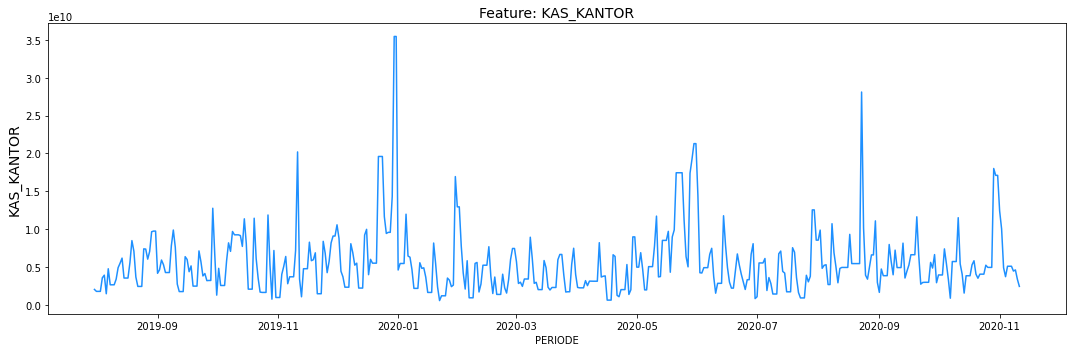

In [49]:
# To compelete the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.lineplot(x=BrJombang_Data['PERIODE'], y=BrJombang_Data[column].fillna(method='ffill'), ax=ax, color='dodgerblue')
ax.set_title('Feature: {}'.format(column), fontsize=14)
ax.set_ylabel(ylabel=column, fontsize=14)
plt.tight_layout()

# plt.savefig('C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\gambar\\visualisasi.png', bbox_inches='tight')
#     ax[i].set_xlim([date(2019, 7, 31), date(2020, 11, 11)])                

<a id='4'></a>
# <p style="background-color:blue; font-family:newtimeroman; font-size:150%; text-align:center; color:white">4. Data Preprocessing</p>

<a id='4.1'></a>
## <p style="background-color:blue; font-family:newtimeroman; font-size:120%; text-align:center; color:white">4.1 Chronological Order and Equidistant Timestamps</p>

The data should be in chronological order and the timestamps should be equidistant in time series. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data.

But, first of all, lets see how to check if our dataset is correctly formated!

In [50]:
BrJombang_Data = BrJombang_Data.sort_values(by='PERIODE')

# Check time intervals
BrJombang_Data['DELTA'] = BrJombang_Data['PERIODE'] - BrJombang_Data['PERIODE'].shift(1)

BrJombang_Data[['PERIODE', 'DELTA']].head()
# BrJombang_Data[['PERIODE', 'DELTA']].to_csv(r'C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\tabel\\chronological time2.csv', index = False)

,PERIODE,DELTA
104,2019-07-31,NaT
357,2019-08-01,1 days
50,2019-08-02,1 days
59,2019-08-03,1 days
153,2019-08-04,1 days


In [51]:
BrJombang_Data['DELTA'].sum(), BrJombang_Data['DELTA'].count()

(Timedelta('469 days 00:00:00'), 467)

This is already the case in our data: The time interval is one day and the data is already in chronological order. Therefore, we do not have to do this additional data preparation step.

<a id='4.2'></a>
## <p style="background-color:blue; font-family:newtimeroman; font-size:120%; text-align:center; color:white">4.2 Handle Missings</p>

As we can see, the dataset has some null values.

We will have to clean them by replacing them by nan values and filling them afterwards

In [52]:
BrJombang_Data = BrJombang_Data.drop('DELTA', axis=1)
BrJombang_Data.isna().sum()

PERIODE       0
KAS_KANTOR    0
dtype: int64

So now we have to fix missing values. Lets take a look of these cases and explore what can we do with them.

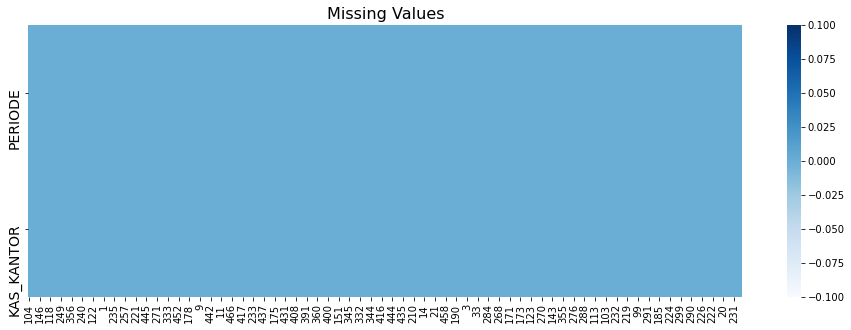

<Figure size 432x288 with 0 Axes>

In [53]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(BrJombang_Data.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()
plt.tight_layout()
# plt.savefig('C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\gambar\\missing values.png', bbox_inches='tight')

### Missing Values, how to handle

* **Option 1: Fill NaN with Outlier or Zero**

In this specific example filling the missing value with an outlier value such as np.inf or 0 seems to be very naive. However, using values like -999, is sometimes a good idea.

* **Option 2: Fill NaN with Mean Value**

Filling NaNs with the mean value is also not sufficient and naive, and doesn't seems to be a good option.

* **Option 3: Fill NaN with Last Value with .ffill()**

Filling NaNs with the last value could be bit better.

* **Option 4: Fill NaN with Linearly Interpolated Value with .interpolate()**

Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring value

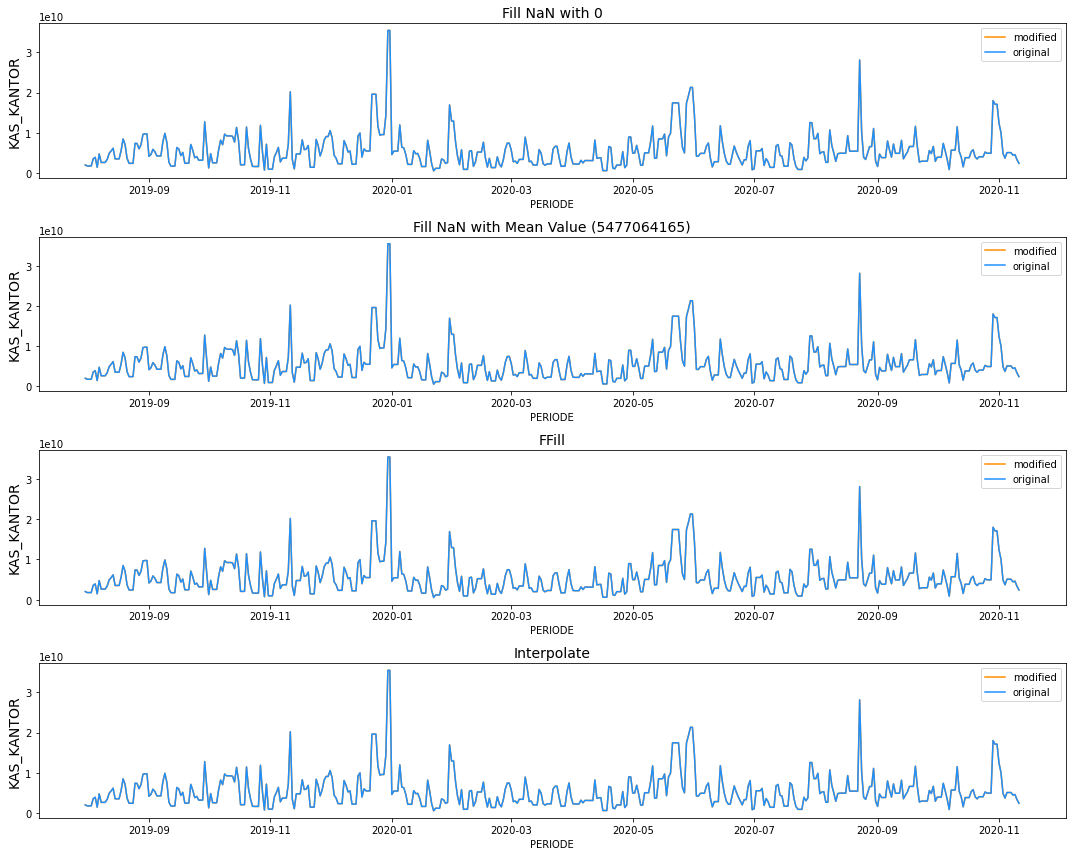

In [54]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=BrJombang_Data['PERIODE'], y=BrJombang_Data['KAS_KANTOR'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=BrJombang_Data['PERIODE'], y=BrJombang_Data['KAS_KANTOR'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='KAS_KANTOR', fontsize=14)

mean_cash_in = BrJombang_Data['KAS_KANTOR'].mean()
sns.lineplot(x=BrJombang_Data['PERIODE'], y=BrJombang_Data['KAS_KANTOR'].fillna(mean_cash_in), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=BrJombang_Data['PERIODE'], y=BrJombang_Data['KAS_KANTOR'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_cash_in:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='KAS_KANTOR', fontsize=14)

sns.lineplot(x=BrJombang_Data['PERIODE'], y=BrJombang_Data['KAS_KANTOR'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=BrJombang_Data['PERIODE'], y=BrJombang_Data['KAS_KANTOR'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='KAS_KANTOR', fontsize=14)

sns.lineplot(x=BrJombang_Data['PERIODE'], y=BrJombang_Data['KAS_KANTOR'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=BrJombang_Data['PERIODE'], y=BrJombang_Data['KAS_KANTOR'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='KAS_KANTOR', fontsize=14)

# for i in range(4):
#     ax[i].set_xlim([PERIODE(2019, 5, 1), PERIODE(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

As we can see, the best option in this case, **interpolate** seems to be the best option!

So, lets interplote missing values

In [55]:
BrJombang_Data.reset_index(inplace = True, drop = True)
BrJombang_Data.head(50)

,PERIODE,KAS_KANTOR
0,2019-07-31,2.033332e+09
1,2019-08-01,1.777037e+09
2,2019-08-02,1.777037e+09
3,2019-08-03,1.777037e+09
4,2019-08-04,3.572994e+09
5,2019-08-05,3.919907e+09
6,2019-08-06,1.462678e+09
7,2019-08-07,4.765839e+09
8,2019-08-08,2.646328e+09
9,2019-08-09,2.646328e+09


<a id='5'></a>
# <p style="background-color:blue; font-family:newtimeroman; font-size:150%; text-align:center; color:white">5. Exploratory Data Analysis</p>

Now, we are going to plot the data and try to extract some knowledge.

<a id='5.1'></a>
## <p style="background-color:blue; font-family:newtimeroman; font-size:120%; text-align:center; color:white">5.1 Feature Engineering</p>

In [56]:
BrJombang_Data['YEAR'] = pd.DatetimeIndex(BrJombang_Data['PERIODE']).year
BrJombang_Data['MONTH'] = pd.DatetimeIndex(BrJombang_Data['PERIODE']).month
BrJombang_Data['DAY'] = pd.DatetimeIndex(BrJombang_Data['PERIODE']).day
BrJombang_Data['WEEKDAY'] = pd.DatetimeIndex(BrJombang_Data['PERIODE']).dayofweek # with starting 0 from monday
BrJombang_Data["WEEKDAY_OR_WEEKEND"]=[1 if i == 5 or i == 6 else 0 for i in BrJombang_Data["WEEKDAY"]] # 0=weekday, 1=weekend

BrJombang_Data

,PERIODE,KAS_KANTOR,YEAR,MONTH,DAY,WEEKDAY,WEEKDAY_OR_WEEKEND
0,2019-07-31,2.033332e+09,2019,7,31,2,0
1,2019-08-01,1.777037e+09,2019,8,1,3,0
2,2019-08-02,1.777037e+09,2019,8,2,4,0
3,2019-08-03,1.777037e+09,2019,8,3,5,1
4,2019-08-04,3.572994e+09,2019,8,4,6,1
...,...,...,...,...,...,...,...
463,2020-11-07,5.098099e+09,2020,11,7,5,1
464,2020-11-08,4.461076e+09,2020,11,8,6,1
465,2020-11-09,4.611864e+09,2020,11,9,0,0
466,2020-11-10,3.376478e+09,2020,11,10,1,0


<a id='5.2'></a>
## <p style="background-color:blue; font-family:newtimeroman; font-size:120%; text-align:center; color:white">5.2 Basic Analysis</p>

In [57]:
BrJombang_Data.describe()

,KAS_KANTOR,YEAR,MONTH,DAY,WEEKDAY,WEEKDAY_OR_WEEKEND
count,4.680000e+02,468.000000,468.000000,468.000000,468.000000,468.000000
mean,5.477064e+09,2019.670940,7.106838,15.532051,2.997863,0.284188
std,4.341043e+09,0.470375,3.286680,8.876324,2.002674,0.451509
min,5.585702e+08,2019.000000,1.000000,1.000000,0.000000,0.000000
25%,2.672010e+09,2019.000000,4.000000,8.000000,1.000000,0.000000
50%,4.748832e+09,2020.000000,8.000000,15.000000,3.000000,0.000000
75%,6.677173e+09,2020.000000,10.000000,23.000000,5.000000,1.000000
max,3.546583e+10,2020.000000,12.000000,31.000000,6.000000,1.000000


In [58]:
BrJombang_Data[["WEEKDAY","KAS_KANTOR"]].groupby(["WEEKDAY"]).mean().sort_values(by="KAS_KANTOR",ascending = False).reset_index()

,WEEKDAY,KAS_KANTOR
0,6,8.289308e+09
1,0,6.934372e+09
2,1,4.806336e+09
3,5,4.775290e+09
4,3,4.663491e+09
5,4,4.551191e+09
6,2,4.310664e+09


<a id='5.3'></a>
## <p style="background-color:blue; font-family:newtimeroman; font-size:120%; text-align:center; color:white">5.3 Plotting the Features</p>

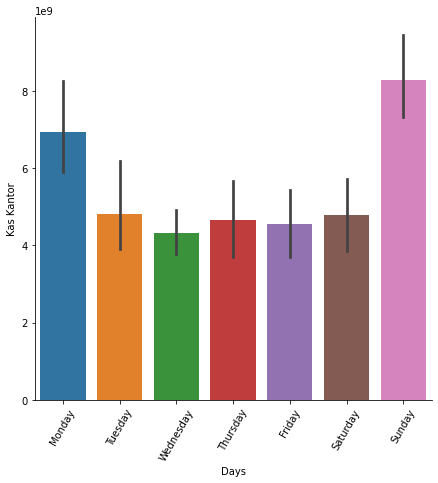

In [59]:
g = sns.catplot(x = "WEEKDAY", y = "KAS_KANTOR", data = BrJombang_Data, kind = "bar", height = 6)
plt.xticks(rotation = 60)
g.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
g.set_xlabels("Days")
g.set_ylabels("Kas Kantor")
# plt.savefig('C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\gambar\\weekday.png', bbox_inches='tight')
plt.show()

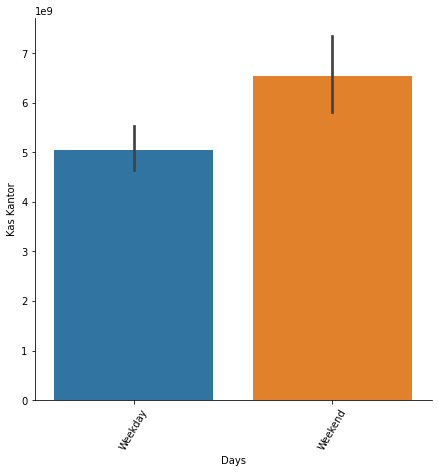

In [60]:
g = sns.catplot(x = "WEEKDAY_OR_WEEKEND", y = "KAS_KANTOR", data = BrJombang_Data, kind = "bar", height = 6)
plt.xticks(rotation = 60)
g.set_xticklabels(["Weekday","Weekend"])
g.set_xlabels("Days")
g.set_ylabels("Kas Kantor")
# plt.savefig('C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\gambar\\weekdayorweekend.png', bbox_inches='tight')
plt.show()

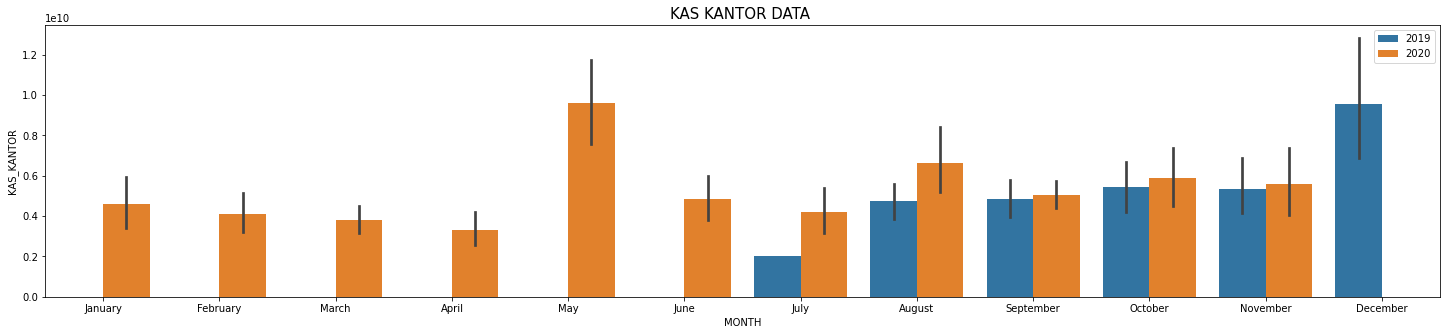

In [61]:
fig, ax = plt.subplots(figsize=(25,5))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="MONTH", y="KAS_KANTOR", hue = 'YEAR',data=BrJombang_Data)
a.set_xticklabels(["January","February","March","April","May","June","July","August","September","October","November","December"])
a.set_title("KAS KANTOR DATA ",fontsize=15)
plt.legend(loc='upper right')
# plt.savefig('C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\gambar\\yearmonth.png', bbox_inches='tight')
plt.show()

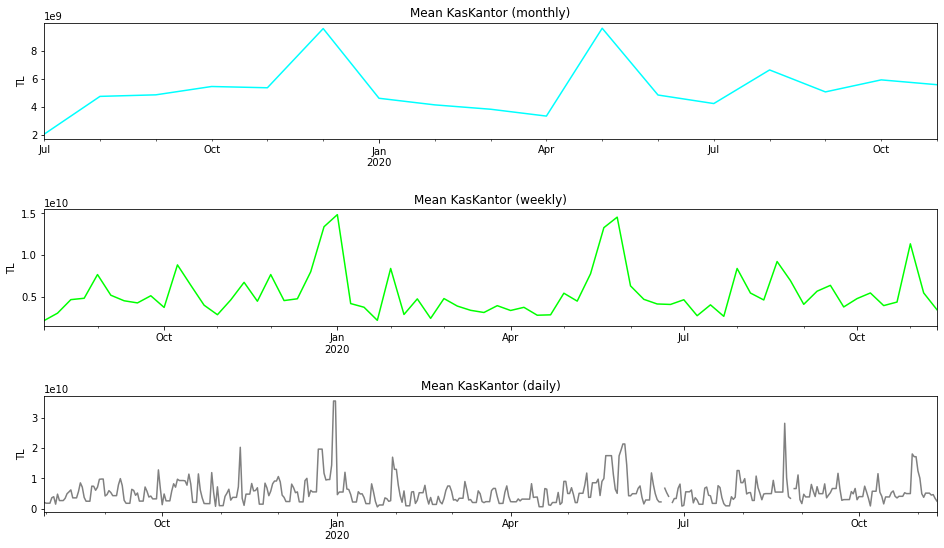

In [62]:
f,ax=plt.subplots(3,1,figsize=(16,9))

df1 = BrJombang_Data.resample('M', on='PERIODE').mean()
df2 = BrJombang_Data.resample('W', on='PERIODE').mean()
df3 = BrJombang_Data.resample('D', on='PERIODE').mean()

df1['KAS_KANTOR'].plot(ax = ax[0], color = 'cyan')
ax[0].set_title('Mean KasKantor (monthly)')
ax[0].set_xlabel('')
ax[0].set_ylabel('TL')

df2['KAS_KANTOR'].plot(ax = ax[1], color = 'lime')
ax[1].set_title('Mean KasKantor (weekly)')
ax[1].set_xlabel('')
ax[1].set_ylabel('TL')

df3['KAS_KANTOR'].plot(ax = ax[2], color = 'grey')
ax[2].set_title('Mean KasKantor (daily)')
ax[2].set_xlabel('')
ax[2].set_ylabel('TL')

f.subplots_adjust(hspace=0.6)
plt.show()

<a id='5.4'></a>
## <p style="background-color:blue; font-family:newtimeroman; font-size:120%; text-align:center; color:white">5.4 TimeSeries Decomposition</p>

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components.

These components are defined as follows:

* **Level**: The average value in the series.
* **Trend**: The increasing or decreasing value in the series.
* **Seasonality**: The repeating short-term cycle in the series.
* **Noise**: The random variation in the series.

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

All series have a level and noise. The trend and seasonality components are optional.

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'KAS_KANTOR'
]

for column in core_columns:
    decomp = seasonal_decompose(BrJombang_Data[column], period=7, model='additive', extrapolate_trend='freq')
    BrJombang_Data[f"{column}_trend"] = decomp.trend
    BrJombang_Data[f"{column}_seasonal"] = decomp.seasonal

<ipython-input-64-702f34a2a4f9>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(BrJombang_Data[column], freq=7, model='additive', extrapolate_trend='freq')


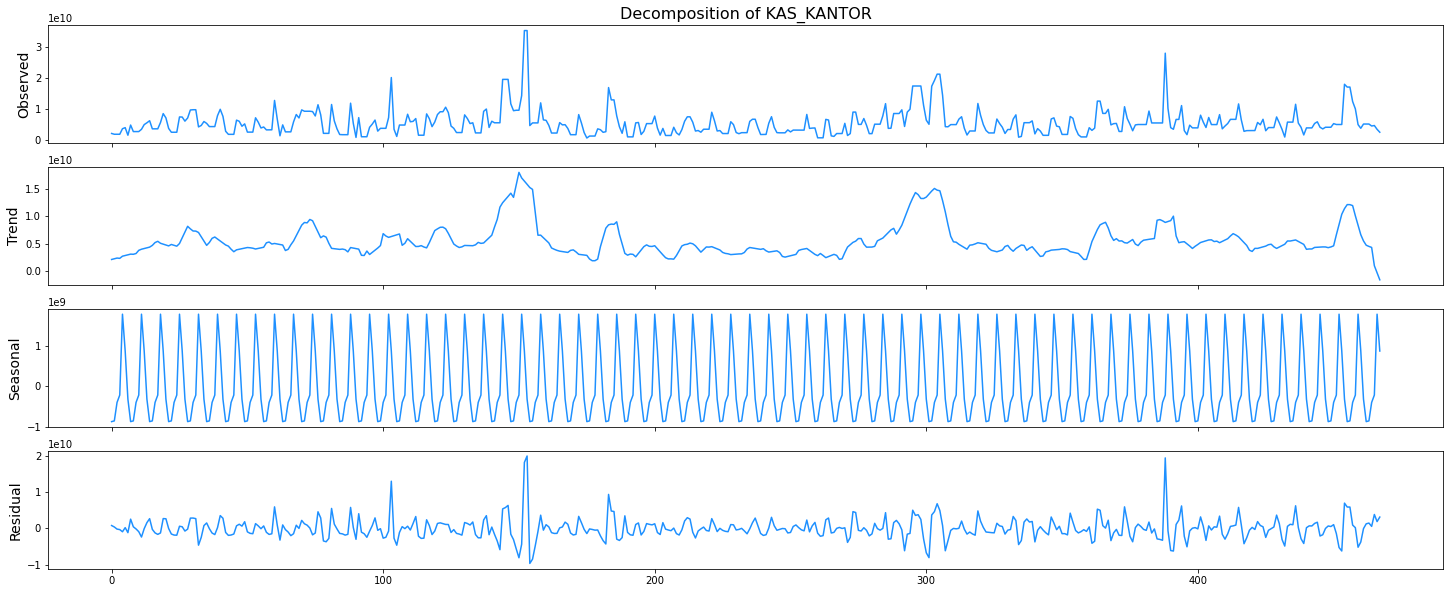

In [64]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(25,10))

for i, column in enumerate(core_columns):
    
    res = seasonal_decompose(BrJombang_Data[column], freq=7, model='additive', extrapolate_trend='freq')

    ax[0].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
    ax[0].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
    ax[1].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
    ax[2].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
    ax[3].set_ylabel('Residual', fontsize=14)

# plt.savefig('C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\gambar\\dekomposisi.png', bbox_inches='tight')
plt.show()


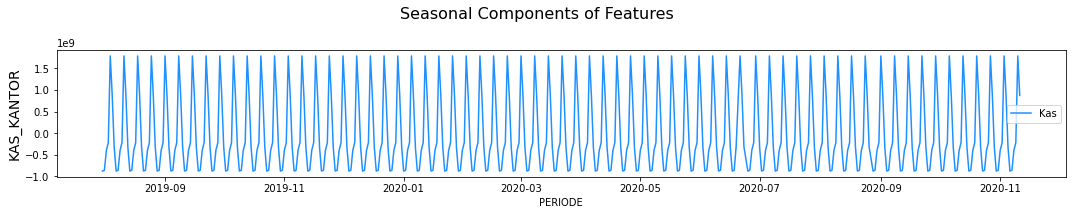

In [68]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=BrJombang_Data['PERIODE'], y=BrJombang_Data[column + '_seasonal'], ax=ax, color='dodgerblue', label='Kas')
    ax.set_ylabel(ylabel=column, fontsize=14)
#     ax[i].set_xlim([PERIODE(2017, 9, 30), PERIODE(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

As we can see from EDA process that:
* **KAS_KANTOR**, **CASH_IN_KANTOR** and **CASH_OUT_KANTOR** has a seasonal pattern that goes up and down and the pattern is not very clear and we can see the maximum and minimum values are uncertain every month
* Cash data hit its highest on Sunday.
* At the end of the week the amount of cash is more than on weekdays.
* In 2020 cash data tends to increase when compared to the same month in the previous year.

<a id='6'></a>
# <p style="background-color:blue; font-family:newtimeroman; font-size:150%; text-align:center; color:white">6. Modeling</p>
Time series can be either univariate or multivariate:

* **Univariate** time series only has a single time-dependent variable.
* **Multivariate** time series have a multiple time-dependent variable.

But, first of all we are going to see how does cross-validation technic works in TimeSeries Analysis. 

In [69]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = BrJombang_Data['PERIODE']
y = BrJombang_Data['KAS_KANTOR']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

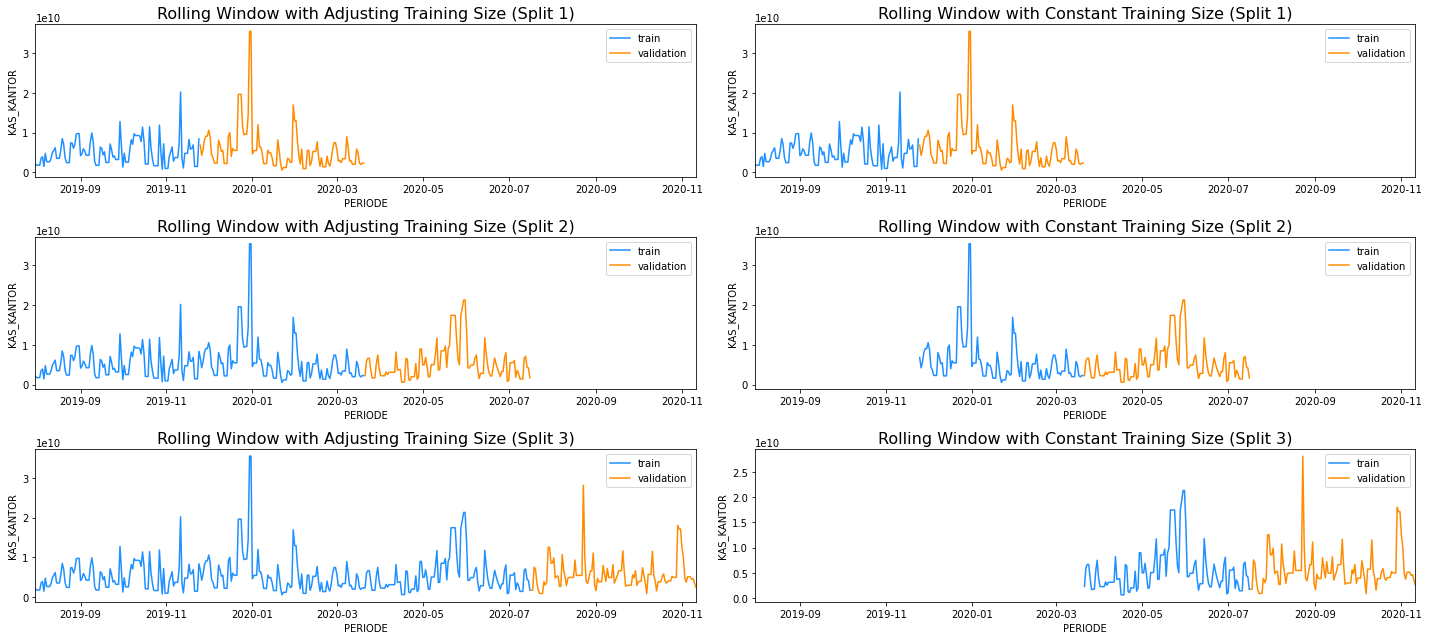

In [70]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(20, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2019, 7, 31), date(2020, 11, 11)])  
    ax[i, 1].set_xlim([date(2019, 7, 31), date(2020, 11, 11)])  
    
plt.tight_layout()
plt.show()

The idea with this plot is to understand which train and test set are we using to fit the model in each iteration. 

<a id='6.1'></a>
## <p style="background-color:blue; font-family:newtimeroman; font-size:120%; text-align:center; color:white">6.1 Models for Univariate Time Series</p>

First of all, we are going to analize univariate TimeSeries forecasting.

**Univariate time series**: Only one variable is varying over time.

In [121]:
train_size = int(len(BrJombang_Data)-7)
test_size = len(BrJombang_Data) - train_size

univariate_BrJombang_Data = BrJombang_Data[['PERIODE', 'KAS_KANTOR']].copy()
univariate_BrJombang_Data.columns = ['ds', 'y']

train = univariate_BrJombang_Data.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_BrJombang_Data.iloc[:train_size, 0]), pd.DataFrame(univariate_BrJombang_Data.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_BrJombang_Data.iloc[train_size:, 0]), pd.DataFrame(univariate_BrJombang_Data.iloc[train_size:, 1])

train.head()
print(len(train), len(x_valid))

461 7


In [122]:
def mean_absolute_percentage_error(y_true, y_pred): #mape function
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

<a id='6.1.1'></a>
### <p style="background-color:blue; font-family:newtimeroman; font-size:100%; text-align:center; color:white">6.1.1 PSF</p>

The PSF (Pattern Sequence Forecasting) algorithm presents a new approach to predicting the behavior of time series based on the similarity of sequence patterns. In this algorithm, k-means is applied to the hourly electricity price data to obtain a sequence of cluster patterns. Second, extracting the sequence before the prediction day to get the target sequence that is used to find a suitable sequence in historical data. Third, a sliding window whose length is equal to the length of the target sequence slides on the cluster pattern sequence with the aim of finding a matching sequence. Finally, approximate results are calculated by averaging all samples immediately following the matching sequence.

source: 
* https://neerajdhanraj.medium.com/psf-a-good-alternative-for-arima-method-for-seasonal-univariate-time-series-forecasting-cc5f737d25c1
* https://www.researchgate.net/publication/224189096_Energy_Time_Series_Forecasting_Based_on_Pattern_Sequence_Similarity
* https://www.sciencedirect.com/science/article/abs/pii/S0020025520306010

In [123]:
# Creating PSF model for prediction.
a = Psf(data = y_train['y'], cycle=7)

# Use predict to predict the values
a.predict(n_ahead = 7)

# Print the model
a.model_print()

# Plot the time series
# a.psf_plot(ts, a.preds)

D:\anaconda3\lib\site-packages\PSF_Py\psf_model.py:34: UserWarning: 
Time Series length is not multiple of 7. Cutting last 6 values!



Original time-series : 
 6      1.462678e+09
7      4.765839e+09
8      2.646328e+09
9      2.646328e+09
10     2.646328e+09
           ...     
456    1.710952e+10
457    1.240672e+10
458    1.002804e+10
459    4.906150e+09
460    3.719065e+09
Name: y, Length: 455, dtype: float64

Predicted Values : 
 [3.62107026e+09 3.08804999e+09 3.44310145e+09 7.04016748e+09
 5.69374660e+09 4.35386184e+09 3.91640642e+09]

k =  3

w =  8

cycle =  7


In [124]:
def psfplot(a, b):
    new_index = []
    for i in range(len(b)):
        new_index.append(len(a) + i)
    # print(new_index)
    pred_psf = pd.Series(data=list(b), index=new_index)
    plt.figure(figsize = (20,5))
    plt.plot(a, ':', marker='.')
    plt.plot(pred_psf, 'r:', marker='.')
    plt.rcParams.update({'font.size' : 20})
    plt.xlabel('Time (Days)')
    plt.ylabel('Kas Kantor')
    plt.legend(('Original', 'Prediction'), loc='best')
#     plt.savefig('C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\gambar\\predict.png', bbox_inches='tight')
    plt.show()

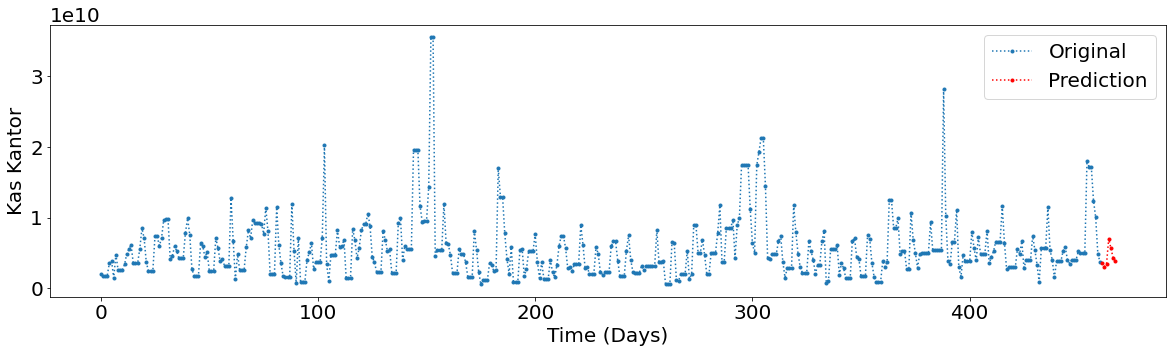

In [125]:
psfplot(y_train['y'], a.preds)

In [126]:
new_index = []
for i in range(len(a.preds)):
    new_index.append(len(y_train['y']) + i)
# print(new_index)
pred_psf = pd.Series(data=list(a.preds), index=new_index)

In [127]:
# Calcuate metrics
score_mae_psf = mean_absolute_error(y_valid, a.preds)
score_rmse_psf = math.sqrt(mean_squared_error(y_valid, a.preds))
score_mape_psf = mean_absolute_percentage_error(y_valid, a.preds)

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse_psf))
print(Fore.GREEN + 'MAPE: {}'.format(score_mape_psf))

RMSE: 1687610961.294684
MAPE: 35.39442558350911


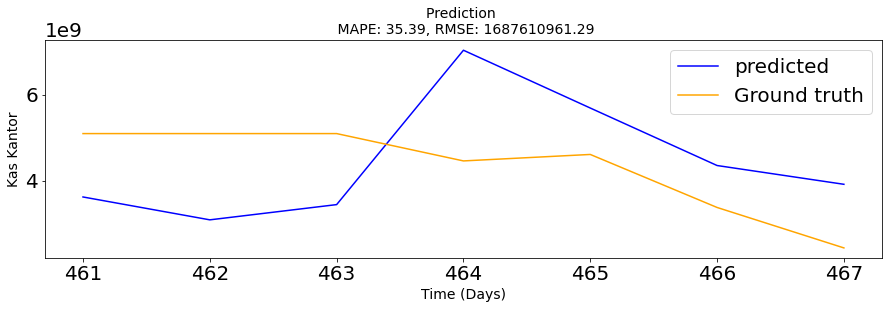

In [128]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

plt.title(f'Prediction \n MAPE: {score_mape_psf:.2f}, RMSE: {score_rmse_psf:.2f}', fontsize=14)
sns.lineplot(x=x_valid.index, y=pred_psf, ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Time (Days)', fontsize=14)
ax.set_ylabel(ylabel='Kas Kantor', fontsize=14)

# plt.savefig('C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\gambar\\predicttest.png', bbox_inches='tight')
plt.show()

<a id='6.1.2'></a>
### <p style="background-color:blue; font-family:newtimeroman; font-size:100%; text-align:center; color:white">6.1.2 Prophet</p>

The first model (which also can handle multivariate problems) we are going to try is Facebook Prophet.

Prophet, or “Facebook Prophet,” is an open-source library for univariate (one variable) time series forecasting developed by Facebook.

Prophet implements what they refer to as an additive time series forecasting model, and the implementation supports trends, seasonality, and holidays.

In [129]:
from prophet import hdays
holidays_indo = hdays.Indonesia()
holidays_indo._populate(2019)
holidays_indo._populate(2020)
hari_libur = pd.DataFrame([holidays_indo], index=['holiday']).T.rename_axis('ds').reset_index()
hari_libur.tanggal = pd.to_datetime(hari_libur.ds)
hari_libur

D:\anaconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
<ipython-input-129-907972867380>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,ds,holiday
0,2019-01-01,New Year's Day
1,2019-02-05,Chinese New Year
2,2019-03-07,Day of Silence/ Nyepi
3,2019-04-03,Ascension of the Prophet
4,2019-05-01,Labor Day
5,2019-05-30,Ascension of Jesus
6,2019-05-19,Buddha's Birthday
7,2019-06-01,Pancasila Day
8,2019-06-06,Eid al-Fitr
9,2019-08-17,Independence Day


Initiate the holidays based in Indonesia

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from prophet import Prophet


# Train the model
model = Prophet(weekly_seasonality=True, holidays=hari_libur)
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae_prophet = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse_prophet = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))
score_mape_prophet = mean_absolute_percentage_error(y_valid, y_pred.tail(test_size)['yhat'])

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse_prophet))
print(Fore.GREEN + 'MAPE: {}'.format(score_mape_prophet))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE: 2114008882.6264365
MAPE: 45.05501545862598


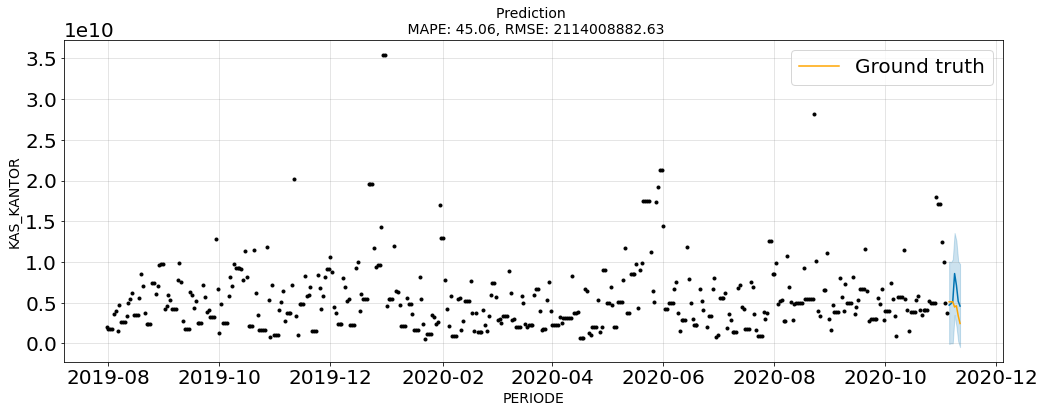

In [131]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAPE: {score_mape_prophet:.2f}, RMSE: {score_rmse_prophet:.2f}', fontsize=14)
ax.set_xlabel(xlabel='PERIODE', fontsize=14)
ax.set_ylabel(ylabel='KAS_KANTOR', fontsize=14)

plt.show()

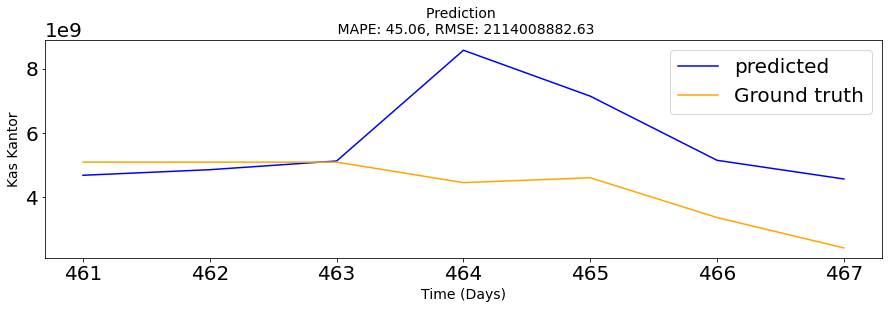

In [132]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

ax.set_title(f'Prediction \n MAPE: {score_mape_prophet:.2f}, RMSE: {score_rmse_prophet:.2f}', fontsize=14)
sns.lineplot(x=x_valid.index, y=y_pred.tail(test_size)['yhat'], ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Time (Days)', fontsize=14)
ax.set_ylabel(ylabel='Kas Kantor', fontsize=14)

plt.show()

<a id='6.1.3'></a>
### <p style="background-color:blue; font-family:newtimeroman; font-size:100%; text-align:center; color:white">6.1.3 Auto-ARIMA</p>

In [83]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=21641.853, Time=4.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22213.565, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=21641.032, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=21939.228, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=21642.434, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=21644.227, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21576.295, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21777.835, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=21572.447, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=21572.301, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=21574.305, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=21574.702, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=21625.392, Time=0.07 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 5.879 seconds
         

As we saw in the previous Steps, AutoARIMA (auto_arima) validates that (1,1,1) is the best configuration for (p,d,q).

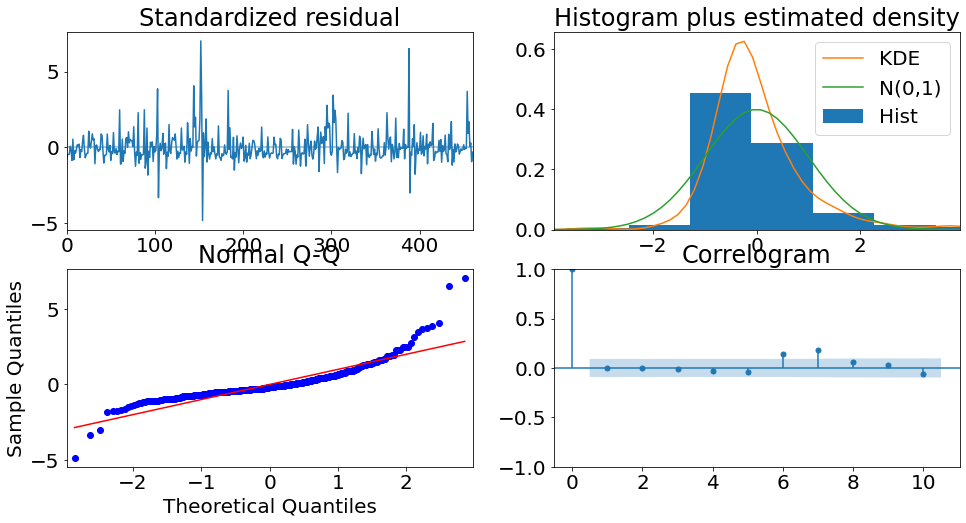

In [84]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

So how to interpret the plot diagnostics?

* **Top left**: The residual errors seem to fluctuate around a mean of zero and have a uniform variance between (-4, 4).

* **Top Right**: The density plot suggest normal distribution with mean zero.

* **Bottom left**: The most part of the blue dots are over the red line, so it seems that the distribution in very low skewed (not skewed for me).

* **Bottom Right**: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated.

In [106]:
from statsmodels.tsa.arima_model import ARIMA

# Fit model
model = ARIMA(y_train, order=(3,0,3))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(7)

# Calcuate metrics
score_mae_auto = mean_absolute_error(y_valid, y_pred)
score_rmse_auto = math.sqrt(mean_squared_error(y_valid, y_pred))
score_mape_auto = mean_absolute_percentage_error(y_valid, y_pred)

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse_auto))
print(Fore.GREEN + 'MAPE: {}'.format(score_mape_auto))

D:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)



RMSE: 2944715169.7620506
MAPE: 76.41553173366675


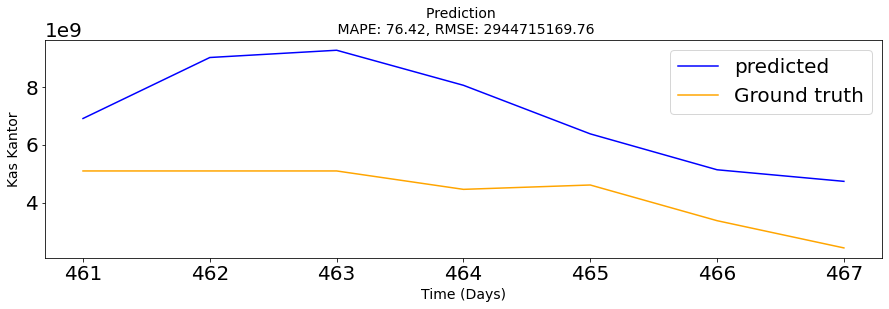

In [107]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

ax.set_title(f'Prediction \n MAPE: {score_mape_auto:.2f}, RMSE: {score_rmse_auto:.2f}', fontsize=14)
sns.lineplot(x=x_valid.index, y=y_pred, ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Time (Days)', fontsize=14)
ax.set_ylabel(ylabel='Kas Kantor', fontsize=14)

plt.show()

<a id='6.1.4'></a>
### <p style="background-color:blue; font-family:newtimeroman; font-size:100%; text-align:center; color:white">6.1.4 LSTM</p>

We are going to use a multi-layered LSTM recurrent neural network to predict the last value of a sequence of values.

The following data pre-processing and feature engineering need to be done before construct the LSTM model.
* Create the dataset, ensure all data is float.
* Normalize the features.
* Split into training and test sets.
* Convert an array of values into a dataset matrix.
* Reshape into X=t and Y=t+1.
* Reshape input to be 3D (num_samples, num_timesteps, num_features).

In [108]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_BrJombang_Data.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.95775201],
       [-0.96509418],
       [-0.96509418],
       [-0.96509418],
       [-0.9136448 ],
       [-0.90370665],
       [-0.97409971],
       [-0.87947296],
       [-0.94019131],
       [-0.94019131]])

In [109]:
#### Defines the rolling window
look_back = 7
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

447 7


In [110]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

Epoch 1/5
447/447 [==============================] - 2s 5ms/step - loss: 0.0286 - val_loss: 0.0120
Epoch 2/5
447/447 [==============================] - 1s 2ms/step - loss: 0.0131 - val_loss: 0.0033
Epoch 3/5
447/447 [==============================] - 1s 2ms/step - loss: 0.0136 - val_loss: 0.0057
Epoch 4/5
447/447 [==============================] - 1s 2ms/step - loss: 0.0126 - val_loss: 0.0046
Epoch 5/5
447/447 [==============================] - 1s 2ms/step - loss: 0.0119 - val_loss: 0.0027
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 128)            69632     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1625      
_____________________

In [111]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse_lstm = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae_lstm = mean_absolute_error(y_test[0], test_predict[:,0])
score_mape_lstm = mean_absolute_percentage_error(y_test[0], test_predict[:,0])

print(Fore.GREEN + 'MAPE: {}'.format(score_mape_lstm))
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse_lstm))

MAPE: 41.745253902107336
RMSE: 1810870795.4920678


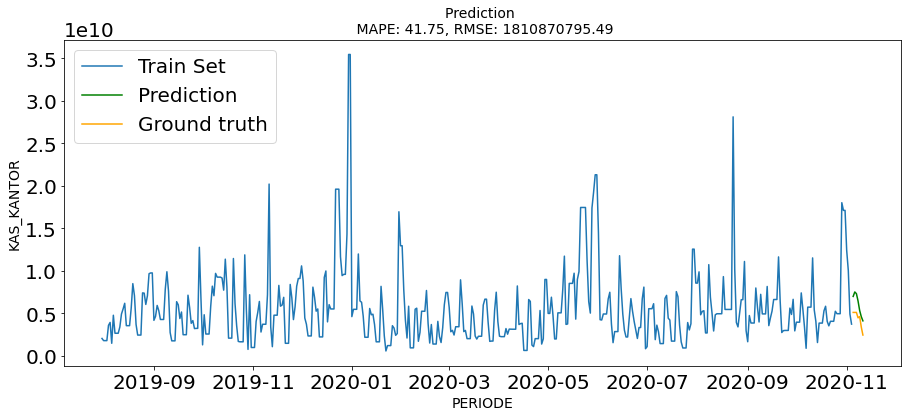

In [112]:
x_train_ticks = univariate_BrJombang_Data.head(train_size)['ds']
y_train = univariate_BrJombang_Data.head(train_size)['y']
x_test_ticks = univariate_BrJombang_Data.tail(test_size)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAPE: {score_mape_lstm:.2f}, RMSE: {score_rmse_lstm:.2f}', fontsize=14)
ax.set_xlabel(xlabel='PERIODE', fontsize=14)
ax.set_ylabel(ylabel='KAS_KANTOR', fontsize=14)

plt.show()

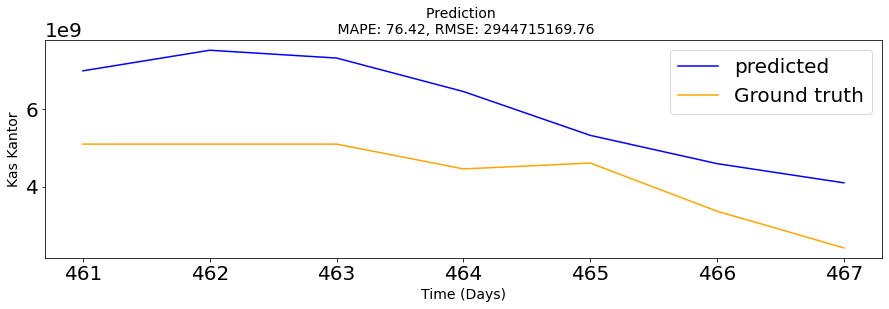

In [113]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

ax.set_title(f'Prediction \n MAPE: {score_mape_auto:.2f}, RMSE: {score_rmse_auto:.2f}', fontsize=14)
sns.lineplot(x=x_valid.index, y=test_predict[:,0], ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Time (Days)', fontsize=14)
ax.set_ylabel(ylabel='Kas Kantor', fontsize=14)

plt.show()

<a id='7'></a>
# <p style="background-color:blue; font-family:newtimeroman; font-size:150%; text-align:center; color:white">7. Evaluation</p>

Evaluate the model using RMSE Score

In [114]:
error = [score_rmse_psf, score_rmse_prophet, score_rmse_auto, score_rmse_lstm]
names = ["PSF", "Prophet", "ARIMA", "LSTM"]
df_error = pd.DataFrame(np.transpose([error, names]))
df_error.columns = ["RMSE Score", "Model"]
df_error["RMSE Score"]=pd.to_numeric(df_error["RMSE Score"])
# df_error.to_csv(r'C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\tabel\\errorRMSE4.csv', index = False)
df_error

,RMSE Score,Model
0,1.687611e+09,PSF
1,3.270029e+09,Prophet
2,2.944715e+09,ARIMA
3,1.810871e+09,LSTM


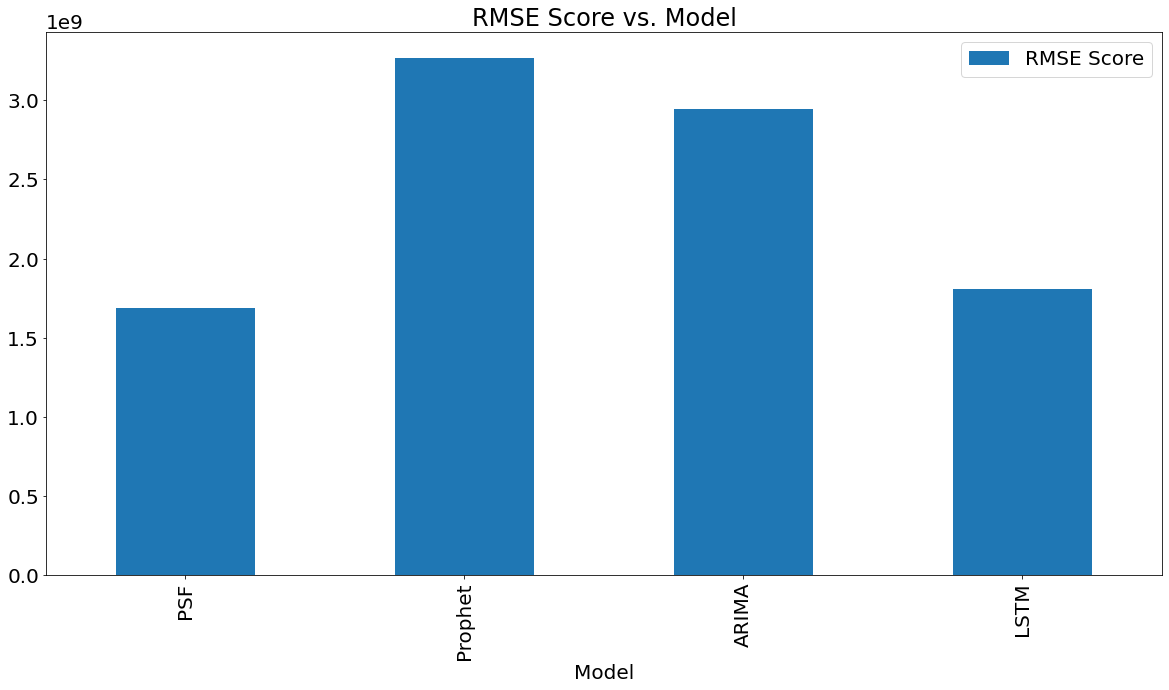

In [115]:
ax.set_xlabel(xlabel='Model', fontsize=14)
ax.set_ylabel(ylabel='RMSE Score', fontsize=14)
ax = df_error.plot.bar(x='Model', y='RMSE Score', title="RMSE Score vs. Model", figsize=(20,10))
# plt.savefig('C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\gambar\\errorRMSE4.png', bbox_inches='tight')

Evaluate the model using MAE Score

In [116]:
error = [score_mae_psf, score_mae_prophet, score_mae_auto, score_mae_lstm]
names = ["PSF", "Prophet", "ARIMA", "LSTM"]
df_error2 = pd.DataFrame(np.transpose([error, names]))
df_error2.columns = ["MAE Score", "Model"]
df_error2["MAE Score"]=pd.to_numeric(df_error2["MAE Score"])
df_error2

,MAE Score,Model
0,1.608991e+09,PSF
1,2.685020e+09,Prophet
2,2.765657e+09,ARIMA
3,1.726839e+09,LSTM


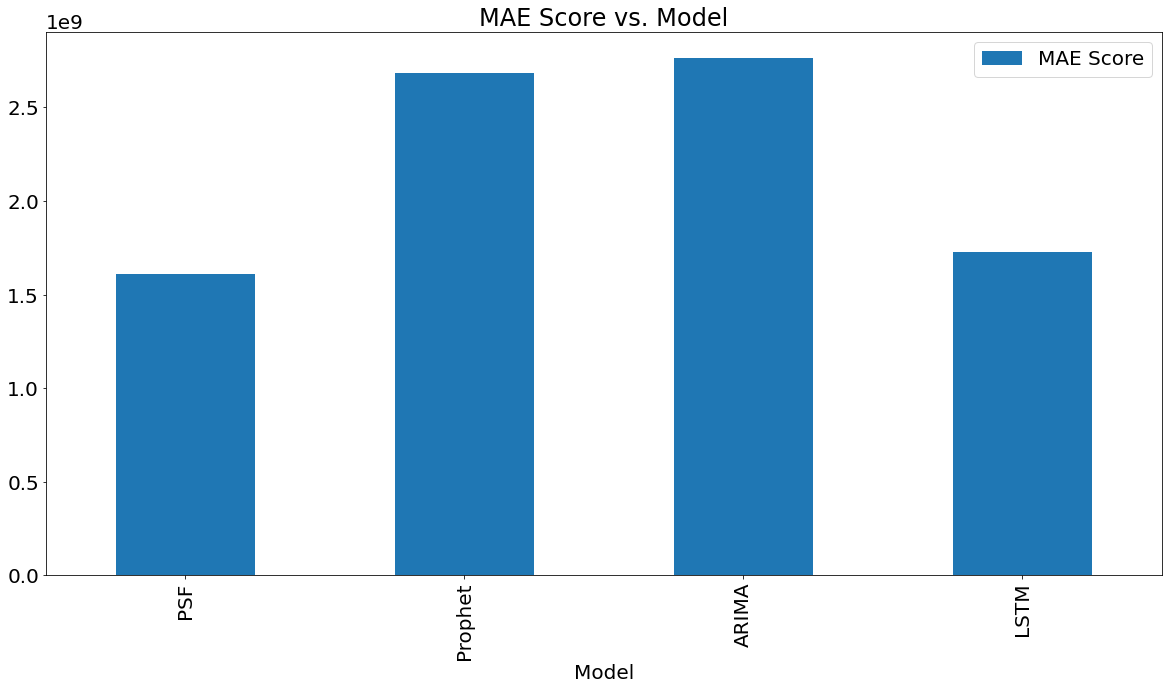

In [117]:
ax.set_xlabel(xlabel='Model', fontsize=14)
ax.set_ylabel(ylabel='MAE Score', fontsize=14)
ax = df_error2.plot.bar(x='Model', y='MAE Score', title="MAE Score vs. Model", figsize=(20,10))

Evaluate the model using MAPE Score

In [118]:
error = [score_mape_psf, score_mape_prophet, score_mape_auto, score_mape_lstm]
names = ["PSF", "Prophet", "ARIMA", "LSTM"]
df_error3 = pd.DataFrame(np.transpose([error, names]))
df_error3.columns = ["MAPE Score", "Model"]
df_error3["MAPE Score"]=pd.to_numeric(df_error3["MAPE Score"])
# df_error3.to_csv(r'C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\tabel\\errorMAPE4.csv', index = False)
df_error3

,MAPE Score,Model
0,35.394426,PSF
1,73.551252,Prophet
2,76.415532,ARIMA
3,41.745254,LSTM


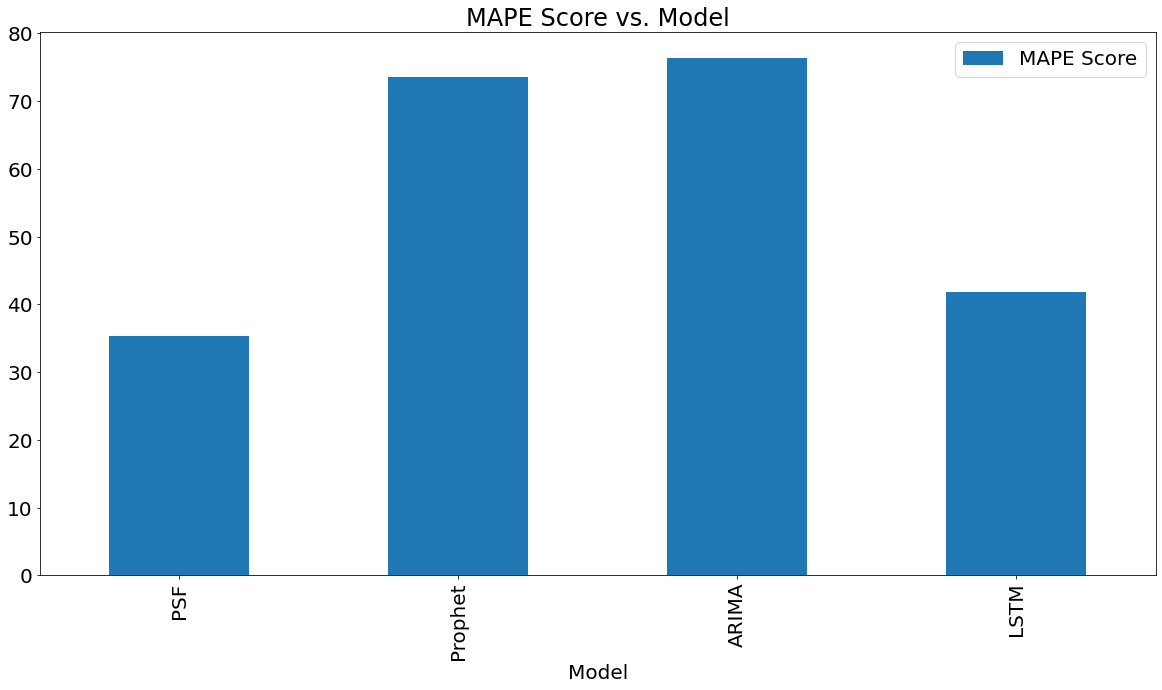

In [119]:
ax.set_xlabel(xlabel='Model', fontsize=14)
ax.set_ylabel(ylabel='MAPE Score', fontsize=14)
ax = df_error3.plot.bar(x='Model', y='MAPE Score', title="MAPE Score vs. Model", figsize=(20,10))
# plt.savefig('C:\\Users\\asus\\OneDrive\\Documents\\TA Script\\gambar\\errorMAPE4.png', bbox_inches='tight')

<a id='8'></a>
# <p style="background-color:blue; font-family:newtimeroman; font-size:150%; text-align:center; color:white">8. Conclusions</p>

From the above graph, we can see that the PSF the best-scoring models for this data from KC Jombang. LSTM is not far behind. ARIMA and Prophet produce much worst-scoring models than the others for this data from KC Jombang. ARIMA is the worst model from all. It seems that when use another cash data from another branch the result is also different.